In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb  # Import XGBoost
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
data = pd.read_csv('malaysia_parcel_volumes.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [3]:
# Linear Regression
X_lr = data.index.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
y_lr = data['Parcel Volume'].values
regression_lr = LinearRegression()
regression_lr.fit(X_lr, y_lr)
y_lr_pred = regression_lr.predict(X_lr)

# ARIMA
model_arima = ARIMA(data['Parcel Volume'], order=(2, 0, 2))
model_fit = model_arima.fit()
predictions_arima = model_fit.predict(start='2017-01-01', end='2018-03-01')

# Random Forest Regressor
X_rf = data.index.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1).astype('int64')  # Convert to int64
y_rf = data['Parcel Volume'].values
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf, y_rf)
predictions_rf = rf_model.predict(X_rf)

# XGBoost
X_xgb = data.index.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
y_xgb = data['Parcel Volume'].values
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_xgb, y_xgb)
predictions_xgb = xgb_model.predict(X_xgb)

C:\Users\Faiz\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Faiz\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Faiz\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Faiz\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


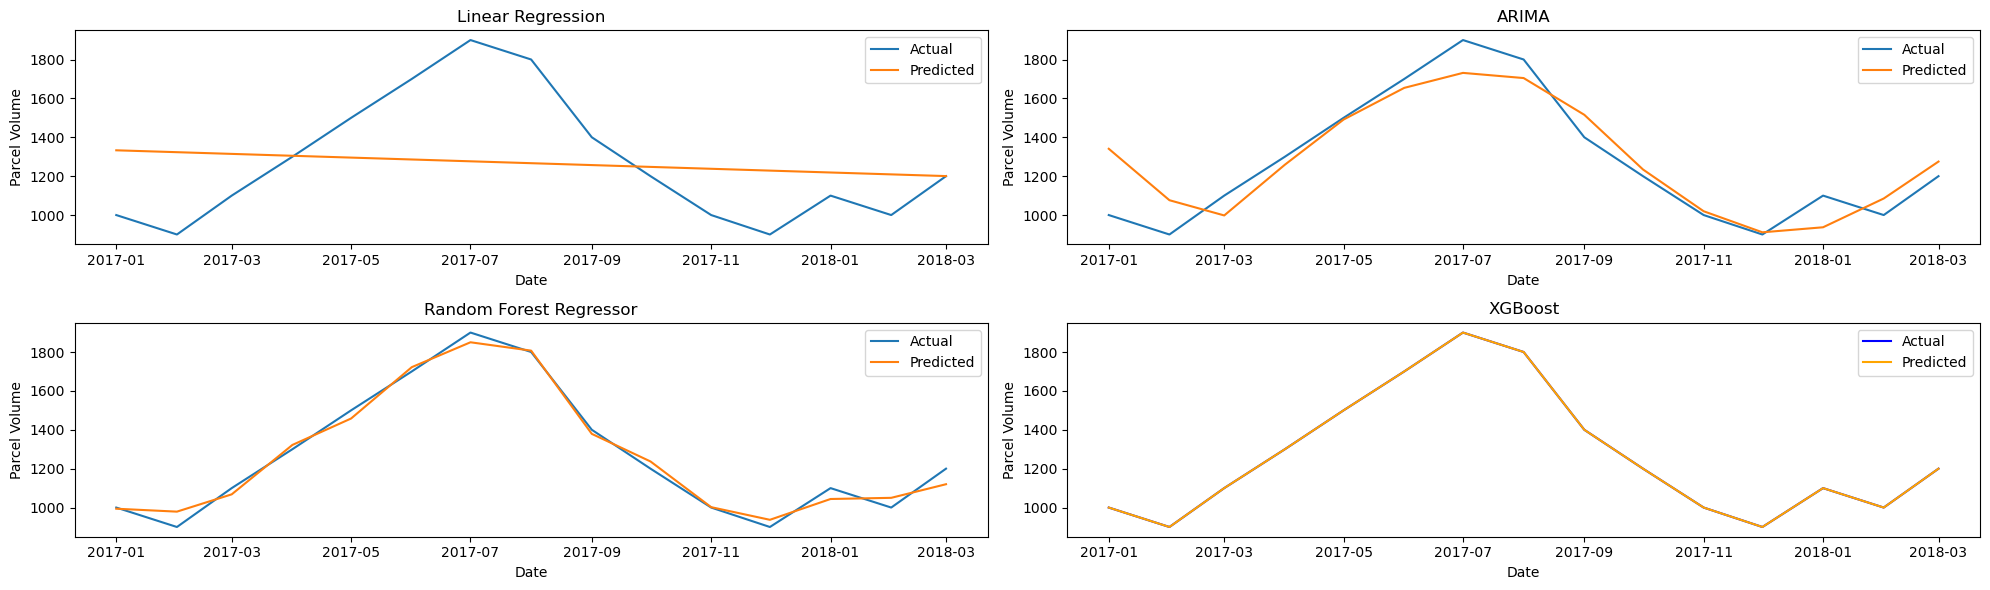

In [4]:
# Combine all graphs in one cell
plt.figure(figsize=(20, 6))

# Linear Regression
plt.subplot(221)
plt.plot(data.index, data['Parcel Volume'], label='Actual')
plt.plot(data.index, y_lr_pred, label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()

# ARIMA
plt.subplot(222)
plt.plot(data['Parcel Volume'], label='Actual')
plt.plot(predictions_arima, label='Predicted')
plt.title('ARIMA')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()

# Random Forest Regressor
plt.subplot(223)
plt.plot(data.index, data['Parcel Volume'], label='Actual')
plt.plot(data.index, predictions_rf, label='Predicted')
plt.title('Random Forest Regressor')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()

# XGBoost
plt.subplot(224)
plt.plot(data.index, data['Parcel Volume'], label='Actual', color='blue')
plt.plot(data.index, predictions_xgb, label='Predicted', color='orange')
plt.title('XGBoost')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
# Calculate MSE and MAE for Linear Regression
mse_lr = mean_squared_error(data['Parcel Volume'], y_lr_pred)
mae_lr = mean_absolute_error(data['Parcel Volume'], y_lr_pred)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression MAE:", mae_lr)

# Calculate MSE and MAE for ARIMA
mse_arima = mean_squared_error(data['Parcel Volume'].loc['2017-01-01':'2018-03-01'], predictions_arima)
mae_arima = mean_absolute_error(data['Parcel Volume'].loc['2017-01-01':'2018-03-01'], predictions_arima)
print("ARIMA MSE:", mse_arima)
print("ARIMA MAE:", mae_arima)

# Calculate MSE and MAE for Random Forest Regressor
mse_rf = mean_squared_error(data['Parcel Volume'], predictions_rf)
mae_rf = mean_absolute_error(data['Parcel Volume'], predictions_rf)
print("Random Forest Regressor MSE:", mse_rf)
print("Random Forest Regressor MAE:", mae_rf)

# Calculate MSE and MAE for XGBoost
mse_xgb = mean_squared_error(data['Parcel Volume'], predictions_xgb)
mae_xgb = mean_absolute_error(data['Parcel Volume'], predictions_xgb)
print("XGBoost MSE:", mse_xgb)
print("XGBoost MAE:", mae_xgb)

Linear Regression MSE: 97865.07591365701
Linear Regression MAE: 255.80215157233954
ARIMA MSE: 16908.543517725782
ARIMA MAE: 98.86411517654685
Random Forest Regressor MSE: 1853.4
Random Forest Regressor MAE: 36.2
XGBoost MSE: 1.4610588550567627e-06
XGBoost MAE: 0.0010945638020833333


In [6]:
# Print Predictions for each model
print("Linear Regression Predictions:")
print(y_lr_pred)

print("\nARIMA Predictions:")
print(predictions_arima)

print("\nRandom Forest Regressor Predictions:")
print(predictions_rf)

print("\nXGBoost Predictions:")
print(predictions_xgb)

Linear Regression Predictions:
[1333.01434484 1323.32170571 1314.56706392 1304.87442479 1295.49445144
 1285.8018123  1276.42183895 1266.72919982 1257.03656069 1247.65658734
 1237.96394821 1228.58397486 1218.89133573 1209.1986966  1200.4440548 ]

ARIMA Predictions:
2017-01-01    1340.869662
2017-02-01    1076.314796
2017-03-01     998.006647
2017-04-01    1258.974453
2017-05-01    1491.243350
2017-06-01    1654.109323
2017-07-01    1731.151392
2017-08-01    1704.534578
2017-09-01    1515.607347
2017-10-01    1234.296594
2017-11-01    1019.545858
2017-12-01     911.285159
2018-01-01     937.135286
2018-02-01    1085.100054
2018-03-01    1275.097288
Freq: MS, Name: predicted_mean, dtype: float64

Random Forest Regressor Predictions:
[ 994.  979. 1068. 1322. 1458. 1722. 1850. 1807. 1379. 1237. 1002.  937.
 1044. 1050. 1120.]

XGBoost Predictions:
[ 999.9993  900.0014 1100.0004 1299.9988 1500.0012 1699.9998 1899.9976
 1800.0007 1399.9988 1200.0012  999.9994  900.0014 1099.9988 1000.0011
 11